In [ ]:
!wget https://www.dropbox.com/s/vynypakezgqkchf/CovidDataset.rar?dl=0

--2020-11-28 09:59:03--  https://www.dropbox.com/s/vynypakezgqkchf/CovidDataset.rar?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/vynypakezgqkchf/CovidDataset.rar [following]
--2020-11-28 09:59:04--  https://www.dropbox.com/s/raw/vynypakezgqkchf/CovidDataset.rar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf8badccb00a71e08eecaf3cf2d.dl.dropboxusercontent.com/cd/0/inline/BEDVXcRlL5Q3gxSt-xvhYD4PN4J3X0-1AS304XAN5f-eoFGJwnc4EiK2lvdPvnzwsSYSuqLZhg9tnU0yRgc2PSBdQ-GatTBmaX10qztukkcDdcCKyllauIHycvC4VuqMxd0/file# [following]
--2020-11-28 09:59:04--  https://ucf8badccb00a71e08eecaf3cf2d.dl.dropboxusercontent.com/cd/0/inline/BEDVXcRlL5Q3gxSt-xvhYD4PN4J3X0-1AS304XAN5f-eoFGJwnc4EiK2lvdPvnzwsSYSuqLZhg9tnU0yRgc2PSBdQ-GatTBma

In [ ]:
!pip install unrar


In [ ]:
!unrar x CovidDataset.rar\?dl\=0


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal

Unexpected end of archive

Extracting from CovidDataset.rar?dl=0


Would you like to replace the existing file CovidDataset/Train/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg
367441 bytes, modified on 2020-10-12 17:46
with a new one
367441 bytes, modified on 2020-10-12 17:46

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit Y

Extracting  CovidDataset/Train/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg       1%  OK 

Would you like to replace the existing file CovidDataset/Train/Covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg
312368 bytes, modified on 2020-10-12 17:46
with a new one
312368 bytes, modified on 2020-10-12 17:46

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit A

Extracting  CovidDataset/Train/Covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg       1%  OK 
Extracting  CovidDataset/Train/Covid/0a7faa2a.jpg                          4%  OK 
Extracting  CovidDataset/Train/Covid/1-s2.0-

In [ ]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image


In [ ]:


model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 54, 54, 64)       

In [ ]:
# Train
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 110 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

FileNotFoundError: ignored

In [ ]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=6,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
6/6 [==============================] - 52s 9s/step - loss: 1.3602 - accuracy: 0.5208 - val_loss: 0.6881 - val_accuracy: 0.5312
Epoch 2/10
6/6 [==============================] - 50s 8s/step - loss: 0.6494 - accuracy: 0.6510 - val_loss: 0.5904 - val_accuracy: 0.9531
Epoch 3/10
6/6 [==============================] - 50s 8s/step - loss: 0.4443 - accuracy: 0.8281 - val_loss: 0.3324 - val_accuracy: 0.9062
Epoch 4/10
6/6 [==============================] - 51s 8s/step - loss: 0.3614 - accuracy: 0.8490 - val_loss: 0.3702 - val_accuracy: 0.9219
Epoch 5/10
6/6 [==============================] - 50s 8s/step - loss: 0.2810 - accuracy: 0.8958 - val_loss: 0.2769 - val_accuracy: 0.9062
Epoch 6/10
6/6 [==============================] - 54s 9s/step - loss: 0.1732 - accuracy: 0.9271 - val_loss: 0.1544 - val_accuracy: 0.9531
Epoch 7/10
6/6 [==============================] - 50s 8s/step - loss: 0.2829 - accuracy: 0.9219 

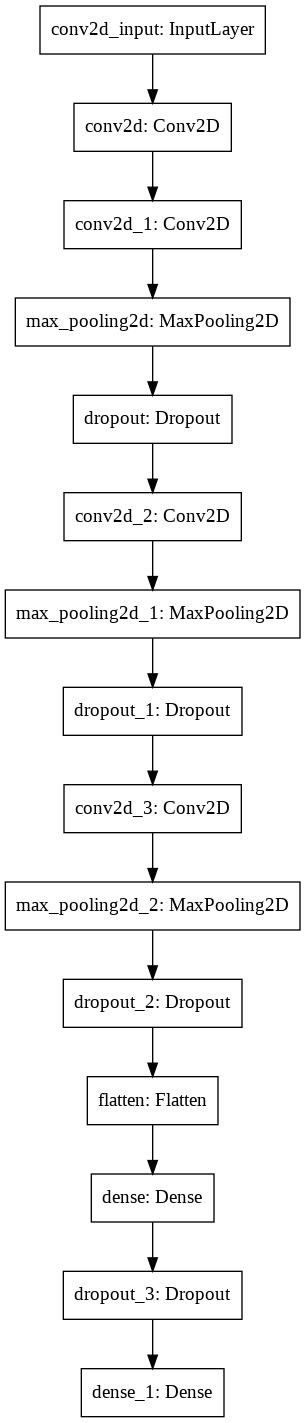

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
plt.figure(figsize = (13,7))
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")

NameError: ignored

<Figure size 936x504 with 0 Axes>

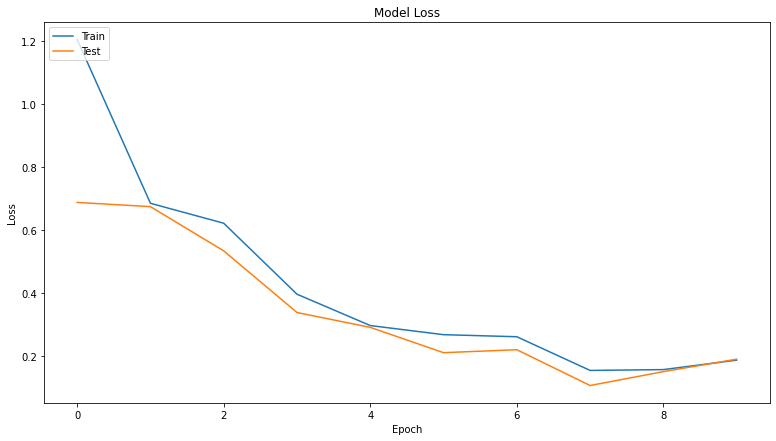

In [ ]:
plt.figure(figsize = (13,7))
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")

In [ ]:
model.evaluate_generator(train_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.09587374329566956, 0.9635416865348816]

In [ ]:
model.evaluate_generator(validation_generator)

[0.1559550017118454, 0.9375]

In [ ]:
model.save("model_adv.h6")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model_adv.h6/assets


In [ ]:
model = load_model('model_adv.h6')

OSError: ignored

In [ ]:
import os

In [ ]:
y_test= []
y_actual= []

In [ ]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
  img = image.load_img("./CovidDataset/Val/Normal/"+i, target_size=(224,224))
  img= image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img = image.load_img("./CovidDataset/Val/Covid/"+i, target_size=(224,224))
  img= image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [ ]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_actual,y_test)

In [ ]:
import seaborn as sns 

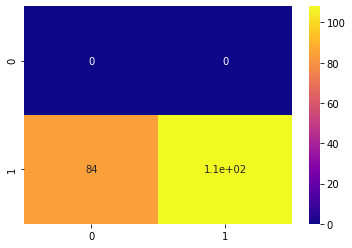

In [ ]:
sns.heatmap(cm, cmap="plasma", annot=True)

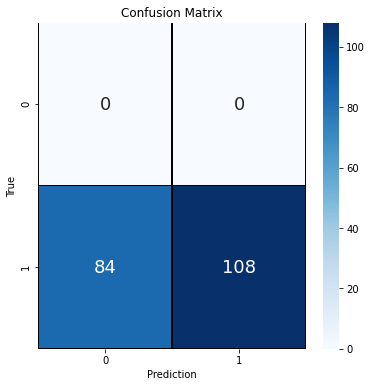

In [ ]:
f, ax = plt.subplots(figsize = (6,6))
sns.heatmap(cm,annot = True, linewidths = 0.3,cmap = "Blues",annot_kws = {"size": 18}, linecolor = "black", fmt = ".0f", ax=ax )
plt.xlabel("Prediction")
plt.title("Confusion Matrix")
plt.ylabel("True")
plt.show()